**Heart Disease Prediction**

In [20]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
df = pd.read_csv("heart_disease_uci.csv")

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**1. Data Preprocessing**

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Replace '?' with NaN and convert to appropriate dtype
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')  # Convert columns where possible

# Drop irrelevant columns
df.drop(columns=['id', 'dataset'], inplace=True)

# Convert target to binary (0 = no disease, 1 = has disease)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Handle missing values
df.dropna(inplace=True)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['num']).columns

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split into features and target
X = df.drop('num', axis=1)
y = df['num']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("✅ Preprocessing Complete")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

✅ Preprocessing Complete
Training samples: 209
Testing samples: 90


<ipython-input-21-7d488e7a7398>:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')  # Convert columns where possible


**2. EDA**

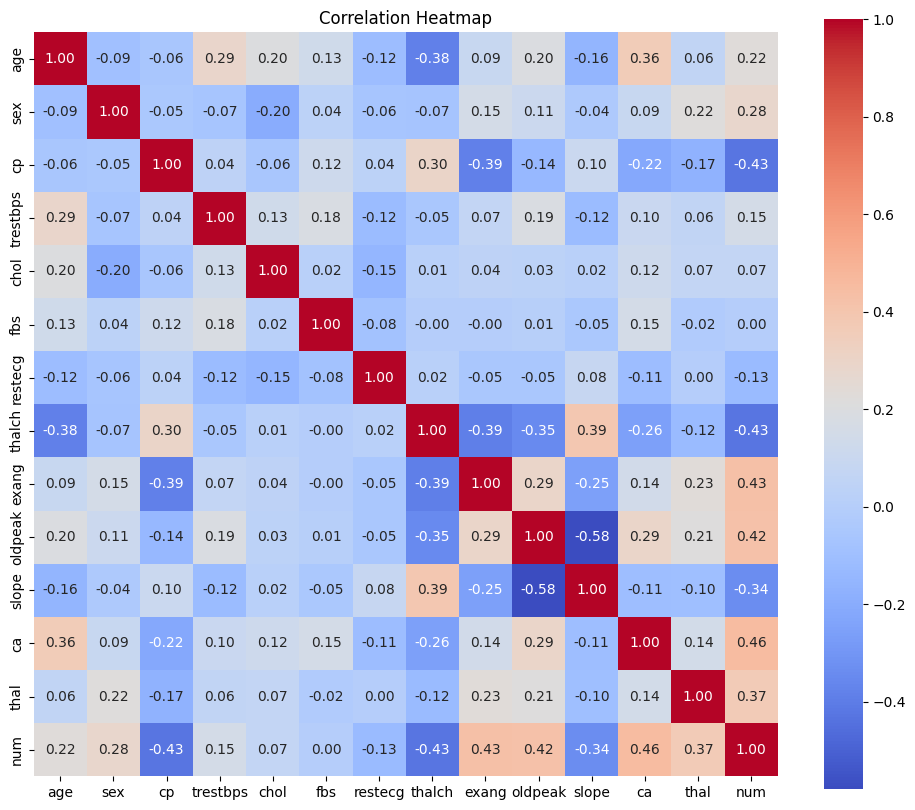

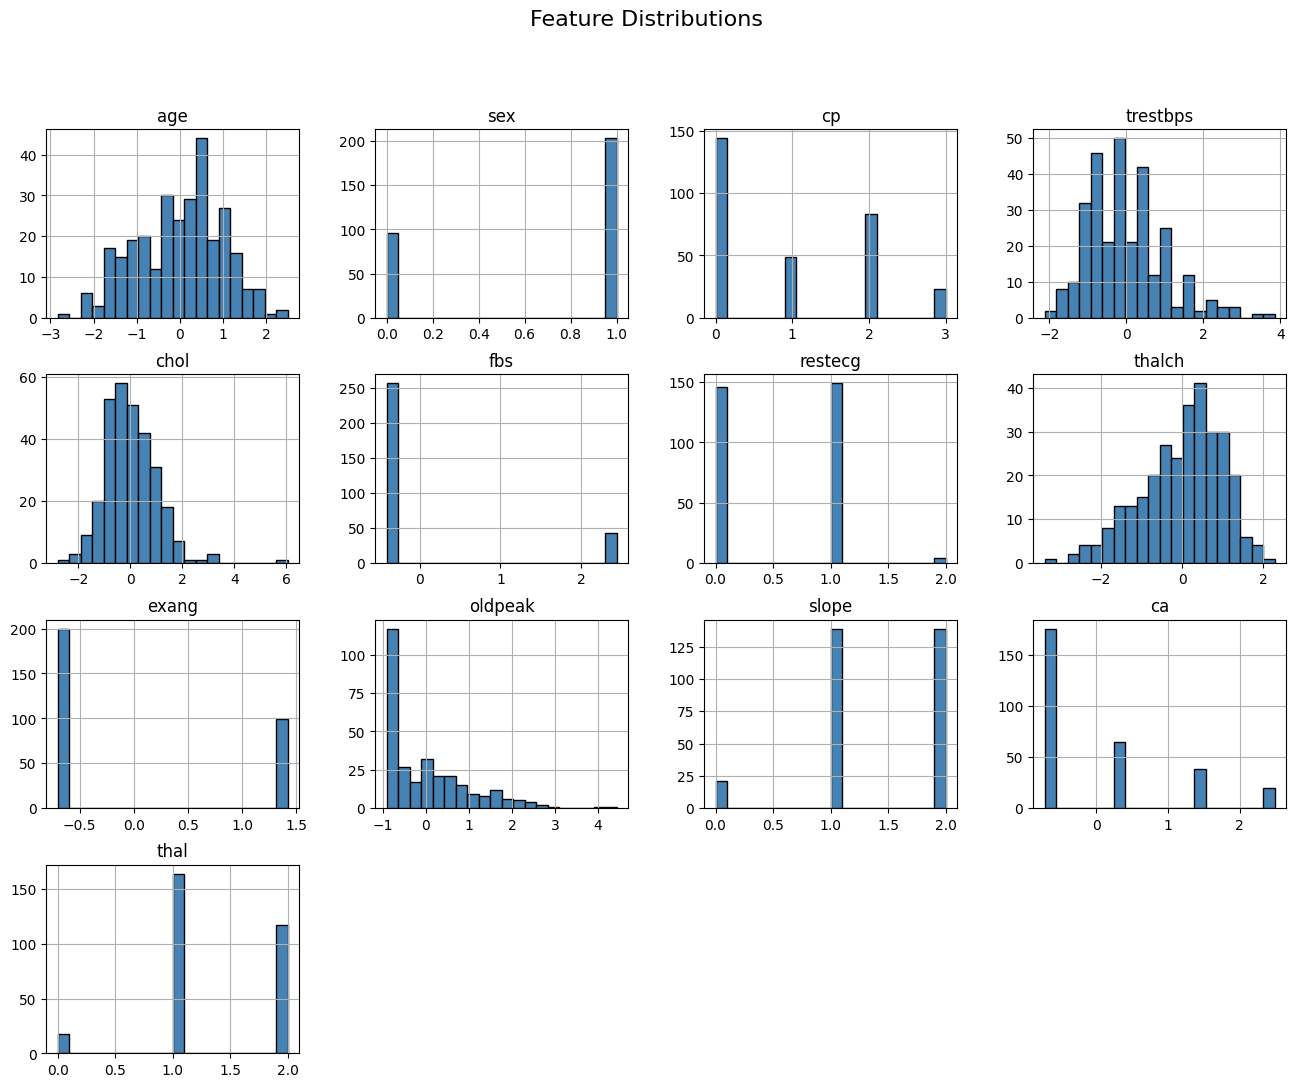

<ipython-input-22-6e5e1862da8e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='Set2')


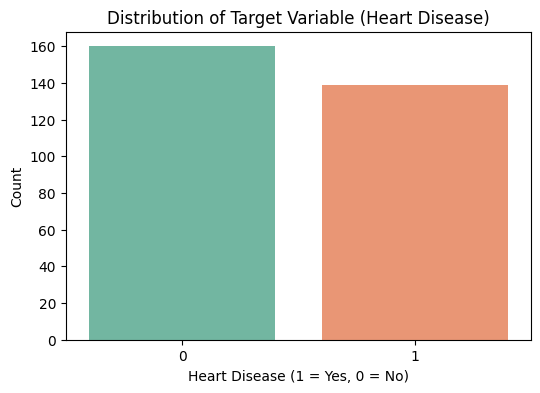

In [22]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

# Histogram for each feature
df.drop(columns='num').hist(bins=20, figsize=(16,12), color='steelblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=df, palette='Set2')
plt.title("Distribution of Target Variable (Heart Disease)")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

**3. Modeling and Evaluation**

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n🔍 {name}")
    print("-" * 30)
    print(f"Accuracy     : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision    : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall       : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



🔍 Logistic Regression
------------------------------
Accuracy     : 0.8444
Precision    : 0.8649
Recall       : 0.7805
F1 Score     : 0.8205
ROC-AUC Score: 0.9228

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        49
           1       0.86      0.78      0.82        41

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90


🔍 K-Nearest Neighbors
------------------------------
Accuracy     : 0.8000
Precision    : 0.8108
Recall       : 0.7317
F1 Score     : 0.7692
ROC-AUC Score: 0.8788

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        49
           1       0.81      0.73      0.77        41

    accuracy                           0.80        90
   macro avg       0.80      0.79      0.80        90
weighted avg       0.80  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:08:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 XGBoost
------------------------------
Accuracy     : 0.8444
Precision    : 0.8293
Recall       : 0.8293
F1 Score     : 0.8293
ROC-AUC Score: 0.9044

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        49
           1       0.83      0.83      0.83        41

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90

